## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow
import keras

from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam, SGD
from keras.initializers import HeNormal
from keras.losses import categorical_crossentropy

import warnings
warnings.filterwarnings('ignore')


## Load The Data

In [2]:
data = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## Splitting

In [3]:
(X_train, y_train) ,(X_test, y_test) = data

In [4]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [5]:
y_train[1]

np.uint8(0)

## Visualization

Label : 0


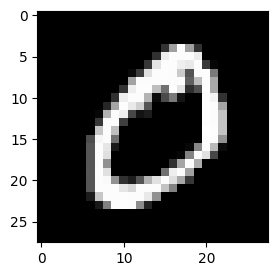

Label : 4


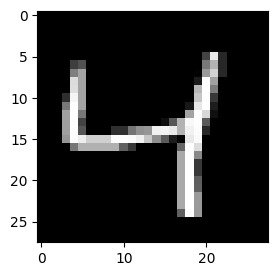

Label : 1


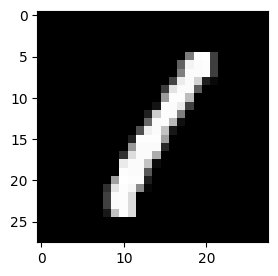

Label : 9


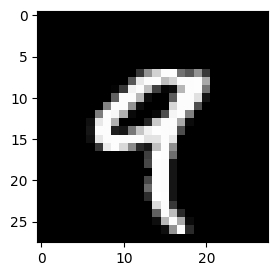

Label : 2


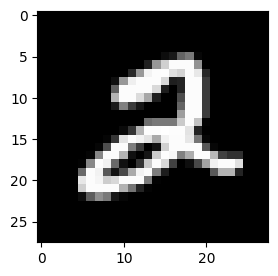

Label : 1


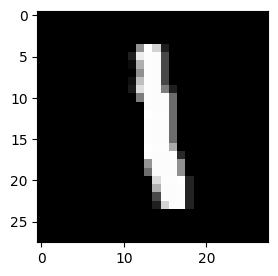

Label : 3


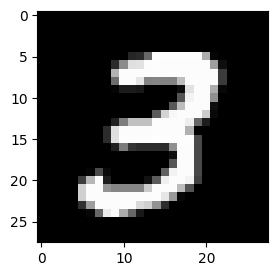

Label : 1


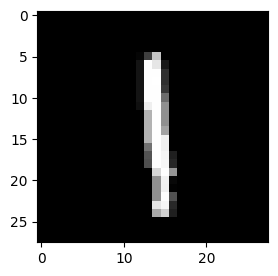

Label : 4


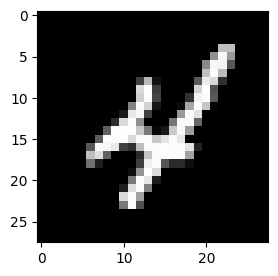

Label : 3


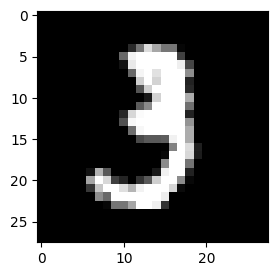

Label : 5


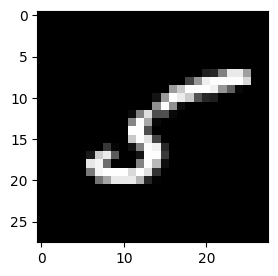

Label : 3


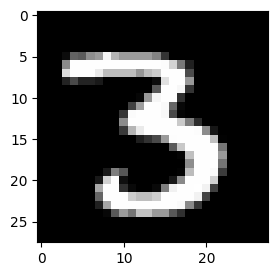

Label : 6


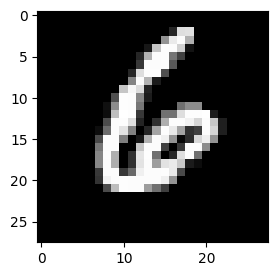

Label : 1


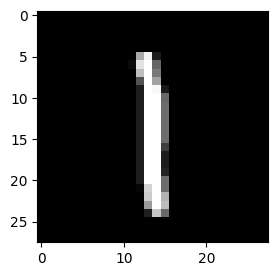

Label : 7


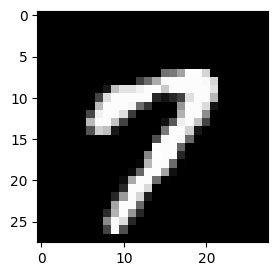

In [6]:
for i in range(15):
  plt.figure(figsize=(3,3))
  plt.imshow(X_train[i+1], cmap='gray')
  print(f'Label : {y_train[i+1]}')
  plt.show()

Label : 2


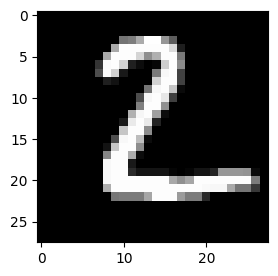

Label : 1


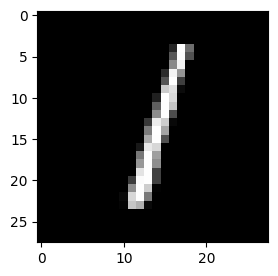

Label : 0


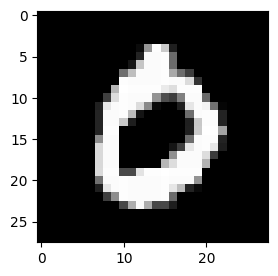

Label : 4


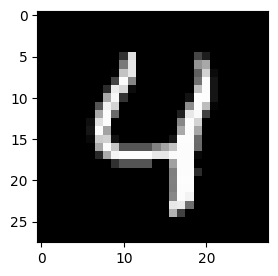

Label : 1


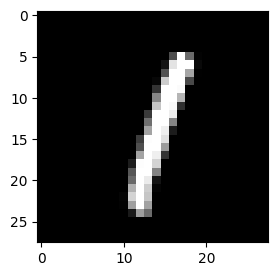

Label : 4


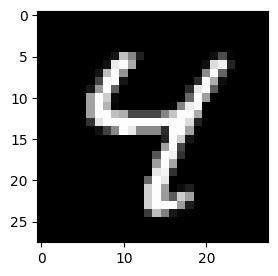

Label : 9


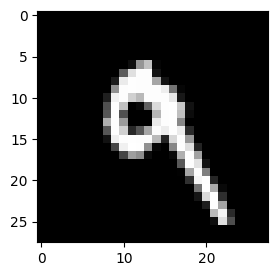

Label : 5


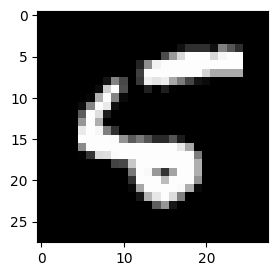

Label : 9


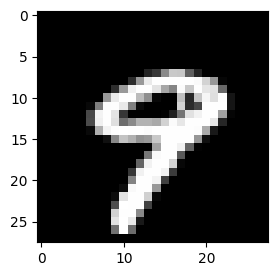

Label : 0


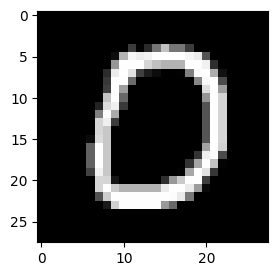

Label : 6


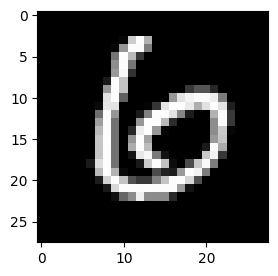

Label : 9


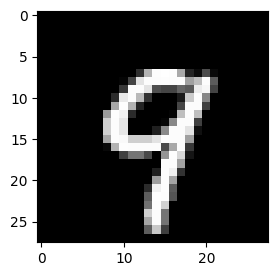

Label : 0


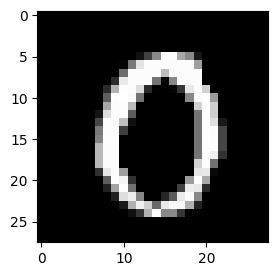

Label : 1


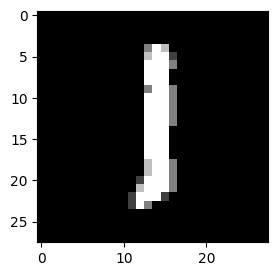

Label : 5


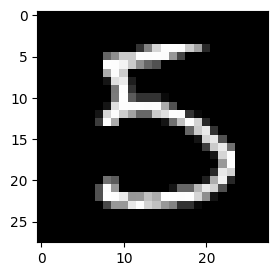

In [7]:
for i in range(15):
  plt.figure(figsize=(3,3))
  plt.imshow(X_test[i+1], cmap='gray')
  print(f'Label : {y_test[i+1]}')
  plt.show()

# Preprocessing

In [8]:
# convert to the Encoding

y_train_new = to_categorical(y_train)
y_test_new = to_categorical(y_test)

In [9]:
y_train_new[4]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [10]:
# Normalize the Training Values

X_train_new = X_train/255
X_test_new  = X_test/255

In [11]:
# Reshape the data to be 4-dimensional for the convolutional layers

X_train_new = X_train_new.reshape(X_train_new.shape[0], 28, 28, 1)
X_test_new = X_test_new.reshape(X_test_new.shape[0], 28, 28, 1)

In [12]:
y_train_new[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
X_train_new.shape[2]

28

In [14]:
X_train_new.shape[1], X_train_new.shape[2], 1

(28, 28, 1)

In [15]:
y_train_new.shape[1]

10

## Model

In [16]:
model = Sequential()



# Input Layer
model.add( Conv2D( filters= 75, kernel_size= (3,3),strides= (1,1), padding = 'same', activation= 'relu',   input_shape = (X_train_new.shape[1], X_train_new.shape[2], 1)) )
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 1
model.add( Conv2D( filters= 92, kernel_size= (3,3),strides= (1,1), padding = 'same', activation= 'relu'))
model.add( Dropout(0.3))
model.add( MaxPooling2D(pool_size=(2, 2)))

# Layer 2
model.add( Conv2D( filters= 68, kernel_size= (3,3),strides= (1,1), padding = 'same', activation= 'relu'))
model.add( BatchNormalization())
model.add( MaxPooling2D(pool_size=(2, 2)))


model.add( Flatten())   # Flatten the Inputs

# Fully Connected Layer
# Hidden Layer 1
model.add( Dense( units = 120, activation= 'relu',kernel_initializer= HeNormal))
model.add( Dropout(0.3) )
model.add( BatchNormalization())
# Hidden Layer 2
model.add( Dense(units = 80 , activation='relu', kernel_initializer= HeNormal()))
model.add( Dropout(0.3))
model.add( BatchNormalization())
# Hidden Layer 3
model.add( Dense(units = 100 , activation='relu', kernel_initializer= HeNormal()))
model.add( Dropout(0.2))
model.add( BatchNormalization())
# Hidden Layer 4
model.add( Dense(units = 90 , activation='relu', kernel_initializer= HeNormal()))
model.add( BatchNormalization())
# Hideen Layer 5
model.add( Dense(units = 100 , activation='relu', kernel_initializer= HeNormal()))
model.add( Dropout(0.2))
model.add( BatchNormalization())
# Hidden Layer 6
model.add( Dense(units = 110 , activation= 'relu', kernel_initializer= HeNormal()))

# Output Layer
model.add( Dense(units= y_train_new.shape[1], activation= 'softmax'))

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 75)     │           750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 75)     │           300 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 75)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 92)     │        62,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 92)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 92)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 68)       │        56,372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 7, 7, 68)       │           272 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 68)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 612)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        73,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 120)            │           480 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 80)             │         9,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 80)             │           320 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │         8,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 90)             │         9,090 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 90)             │           360 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │         9,10

 Total params: 243,596 (951.55 KB)

 Trainable params: 242,330 (946.60 KB)

 Non-trainable params: 1,266 (4.95 KB)

In [18]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [19]:
history = model.fit(X_train_new, y_train_new, epochs= 17, batch_size= 100, validation_data=(X_test_new, y_test_new), validation_split=0.1, verbose=2)

Epoch 1/17
600/600 - 21s - 34ms/step - accuracy: 0.7887 - loss: 0.6463 - val_accuracy: 0.9735 - val_loss: 0.0900
Epoch 2/17
600/600 - 11s - 18ms/step - accuracy: 0.9619 - loss: 0.1423 - val_accuracy: 0.9826 - val_loss: 0.0575
Epoch 3/17
600/600 - 5s - 9ms/step - accuracy: 0.9720 - loss: 0.1076 - val_accuracy: 0.9837 - val_loss: 0.0592
Epoch 4/17
600/600 - 5s - 8ms/step - accuracy: 0.9786 - loss: 0.0845 - val_accuracy: 0.9897 - val_loss: 0.0368
Epoch 5/17
600/600 - 5s - 8ms/step - accuracy: 0.9816 - loss: 0.0748 - val_accuracy: 0.9876 - val_loss: 0.0461
Epoch 6/17
600/600 - 5s - 9ms/step - accuracy: 0.9825 - loss: 0.0703 - val_accuracy: 0.9902 - val_loss: 0.0372
Epoch 7/17
600/600 - 5s - 8ms/step - accuracy: 0.9851 - loss: 0.0625 - val_accuracy: 0.9908 - val_loss: 0.0361
Epoch 8/17
600/600 - 5s - 8ms/step - accuracy: 0.9867 - loss: 0.0552 - val_accuracy: 0.9883 - val_loss: 0.0392
Epoch 9/17
600/600 - 5s - 8ms/step - accuracy: 0.9873 - loss: 0.0528 - val_accuracy: 0.9886 - val_loss: 0.04

In [20]:
print('Training', model.evaluate( X_train_new, y_train_new))
print('Test', model.evaluate( X_test_new, y_test_new))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9973 - loss: 0.0105
Training [0.011023584753274918, 0.9971500039100647]
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9903 - loss: 0.0418
Test [0.031275879591703415, 0.992900013923645]


## Accuracy Visualization

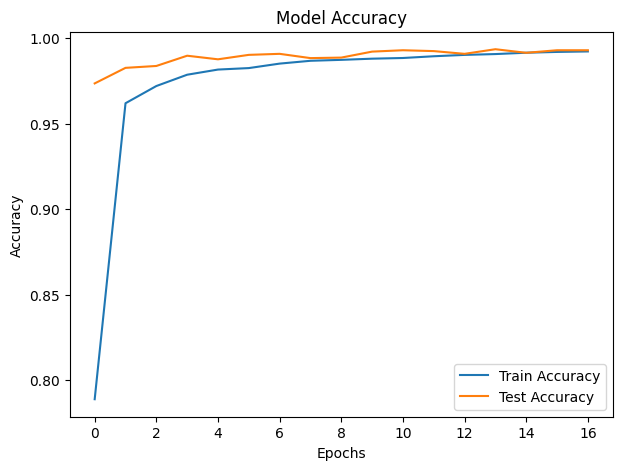

In [21]:
plt.figure(figsize=(7,5))
plt.plot(history.history['accuracy'], label= 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label= 'Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Loss Visualization

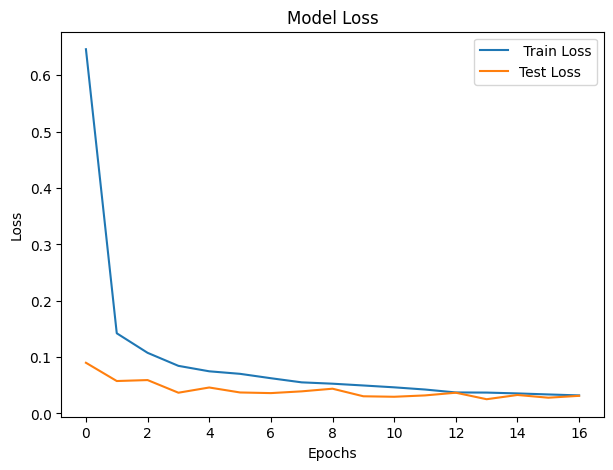

In [22]:
plt.figure(figsize= (7,5))
plt.plot(history.history['loss'], label=' Train Loss')
plt.plot(history.history['val_loss'], label= 'Test Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
X_test_new.shape[0]

10000

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


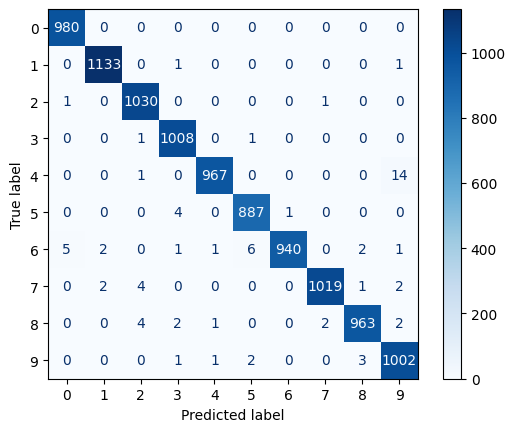

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test is your true labels and model is your trained model
X_test_new = X_test_new.reshape(X_test_new.shape[0], 28, 28, 1)
y_pred = model.predict(X_test_new)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_new, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

In [25]:
np.argmax(model.predict(X_test_new[1].reshape(1,28,28,1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step


np.int64(2)

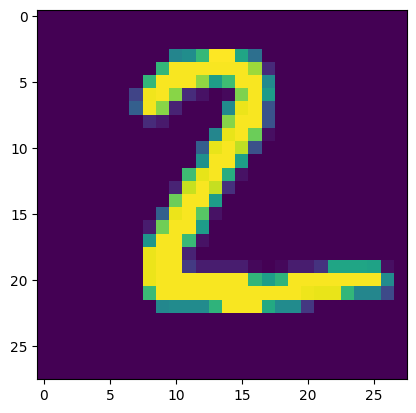

In [26]:
plt.imshow(X_test_new[1])

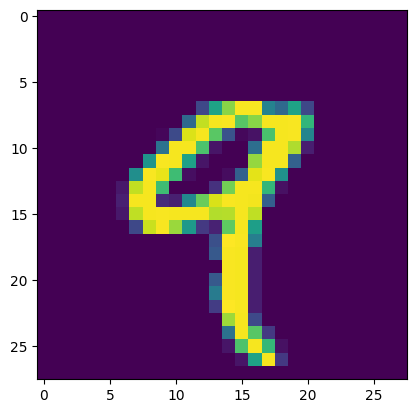

In [27]:
plt.imshow(X_train_new[4])

In [28]:
y_train_new[4]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [33]:
import cv2

In [34]:
img = cv2.imread('/content/5img2.jpeg', cv2.IMREAD_GRAYSCALE)
img

In [42]:
import tensorflow as tf
tf.saved_model.save(model, 'digit')
